In [3]:
## Observations and Insights 

1. The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), 
and Zoniferol has the smaller mice number (182).By removing duplicates the total number of mice is 248. 
The total count of mice by gender also showed that 124 female mice and 125 male mice.

2. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation,
when the mouse weight increases the average tumor volume also increases.

3. The regression analysis helped us to understand how much the average tumor volume (dependent variable)
will change when weight of mice change(independent variables). 
The R-squared value is 0.70, which means 70% the model fit the data, which is fairely good to predict the data from the model.
Higher R-squared values represent smaller differences between the observed data, and the fitted value. 
70% the model explains all of the variation in the response variable around its mean.

4. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.


In [381]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [382]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())


249

In [383]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes =  combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
dupes


array(['g989'], dtype=object)

In [384]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_df = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dupes_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [385]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(dupes) == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [386]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()



248

## Summary Statistics

In [387]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.mean_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summstats=clean_data.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_cleandata = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


summary_df = pd.DataFrame({"Mean" : mean_cleandata, "Median": med_cleandata, "Variance" : var_cleandata, "Standard Deviation": std_cleandata, "SEM" : sem_cleandata})
summary_df = summary_df.round(2)
summary_df.head()


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [388]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df_agg = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df_agg = summary_df.round(2)
summary_df_agg.head()





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [389]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg.agg('mean', axis='rows')

Mean                  50.976
Median                49.903
Variance              47.858
Standard Deviation     6.821
SEM                    0.502
dtype: float64

## Bar and Pie Charts

In [390]:
drugdata = clean_data["Drug Regimen"].value_counts()
drugdata

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

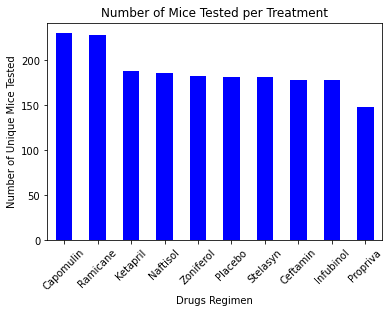

In [391]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drugdata = clean_data["Drug Regimen"].value_counts()
y_axis = drugdata.values
x_axis = drugdata.values
plt.xlabel('Drugs Regimen')
plt.ylabel('Number of Unique Mice Tested') 
plt.title("Number of Mice Tested per Treatment")
drugdata.plot(kind="bar", color="blue")
plt.xticks(rotation="45")

<function matplotlib.pyplot.show(*args, **kw)>

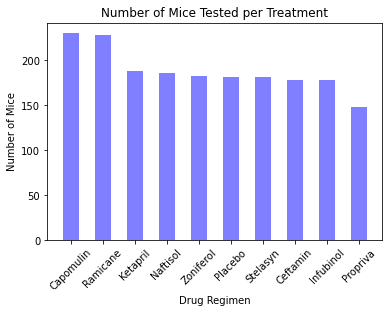

In [392]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



drugs= clean_data["Drug Regimen"].value_counts()
y_axis=drugs.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drugs.index
plt.bar(x_drugs, y_axis, color='b', alpha=0.5, align= "center", width= .5)
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="45")
plt.show





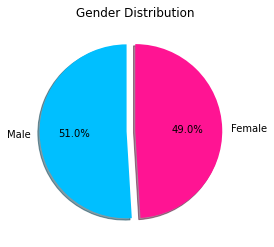

In [393]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genx=clean_data["Sex"].value_counts()
labels=genx.values
sizes=genx.values
colors=["deepskyblue", "deeppink"]
explode=[0.1,0]
genx.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Distribution")
plt.ylabel(" ")
plt.show()


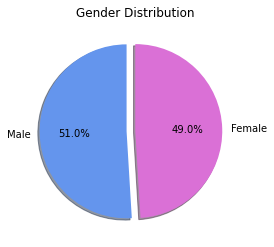

In [394]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genz=clean_data["Sex"].value_counts()
labels=genz.index 
sizes=genz.values
colors=["cornflowerblue", "orchid"]
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [395]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_final=clean_data.groupby("Mouse ID").max().reset_index()
merged=tumor_final[["Mouse ID","Timepoint"]].merge(clean_data, on=["Mouse ID","Timepoint"], how='left')
merged.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [396]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
capomulin= merged.loc[merged['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merged.loc[merged['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merged.loc[merged['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merged.loc[merged['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
#Capomulin
quartile_cap=capomulin.quantile([.25,.5,.75])
lower_cap=quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr_cap= upper_cap-lower_cap
lowout_cap=lower_cap-(1.5*iqr_cap)
upout_cap=upper_cap+(1.5*iqr_cap)
#Ramicane
quartile_ram=ramicane.quantile([.25,.5,.75])
lower_ram=quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr_ram=upper_ram-lower_ram
lowout_ram=lower_ram-(1.5*iqr_ram)
upout_ram=upper_ram+(1.5*iqr_ram)
#Infubinol
quartile_inbol=infubinol.quantile([.25,.5,.75])
lower_inbol=quartile_inbol[.25]
upper_inbol=quartile_inbol[.75]
iqr_inbol=upper_inbol-lower_inbol
lowout_inbol=lower_inbol-(1.5*iqr_inbol)
upout_inbol=upper_inbol+(1.5*iqr_inbol)
#Ceftamin
quartile_ceft=ceftamin.quantile([.25,.5,.75])
lower_ceft= quartile_ceft[.25]
upper_ceft=quartile_ceft[.75]
iqr_ceft= upper_ceft-lower_ceft
lowout_ceft=lower_ceft-(1.5*iqr_ceft)
upout_ceft=upper_ceft+(1.5*iqr_ceft)
print(f"Below {round(lowout_cap, 2)} is an outlier for Capomulin")
print(f"Above {round(upout_cap, 2)} is an outlier for Capomulin")
print(f"Below {round(lowout_ram, 2)} is an outlier for Ramicane")
print(f"Above {round(upout_ram, 2)} is an outlier for Ramicane")
print(f"Below {round(lowout_inbol, 2)} is an outlier for Infubinol")
print(f"Above {round(upout_inbol, 2)} is an outlier for Infubinol")
print(f"Below {round(lowout_ceft, 2)} is an outlier for Ceftamin")
print(f"Above {round(upout_ceft, 2)} is an outlier for Ceftamin")
    

Below 20.7 is an outlier for Capomulin
Above 51.83 is an outlier for Capomulin
Below 17.91 is an outlier for Ramicane
Above 54.31 is an outlier for Ramicane
Below 36.83 is an outlier for Infubinol
Above 82.74 is an outlier for Infubinol
Below 25.36 is an outlier for Ceftamin
Above 87.67 is an outlier for Ceftamin


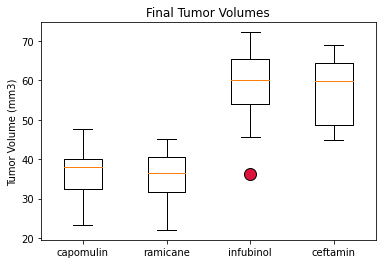

In [397]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxedplot = dict(markerfacecolor='crimson',markersize=12)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= boxedplot)
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

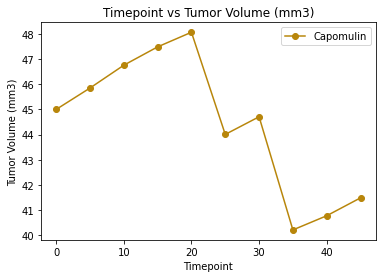

In [398]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_drug= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
mouse_capomulin= clean_data.loc[clean_data['Mouse ID'] == 'l509']
plt.plot(mouse_capomulin["Timepoint"], mouse_capomulin["Tumor Volume (mm3)"], marker ='o', color='darkgoldenrod', label="Capomulin")
plt.legend(loc="upper right")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

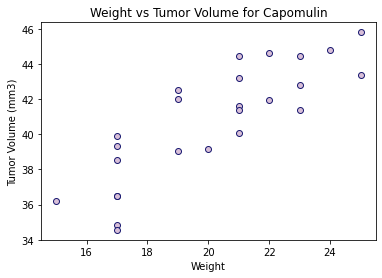

In [399]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_tabs= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
capomulin_mean=capomulin_tabs.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_mean["Weight (g)"],capomulin_mean["Tumor Volume (mm3)"],facecolors="thistle", edgecolors="midnightblue")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


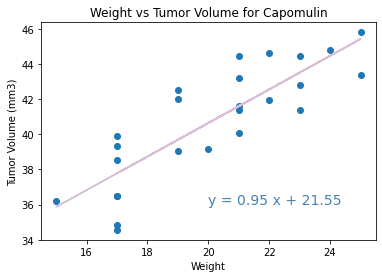

In [400]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(capomulin_mean["Weight (g)"],capomulin_mean["Tumor Volume (mm3)"])
regress_values=capomulin_mean["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(capomulin_mean["Weight (g)"],capomulin_mean["Tumor Volume (mm3)"] )
plt.plot(capomulin_mean["Weight (g)"], regress_values, color='thistle')
plt.annotate(line_eq,(20,36), color='steelblue', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {rvalue**2}")

plt.show()